# Basemap - create maps in Python

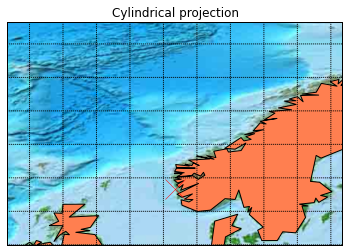

In [2]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

# setup Basemap
m = Basemap(projection='cyl',
            llcrnrlon=-10.,
            llcrnrlat=55,
            urcrnrlon=20.,
            urcrnrlat=75.)


m.etopo()                # add topography
m.drawcoastlines()
m.fillcontinents(color='coral',
                 lake_color='aqua')

# add point to the plot
m.plot(5, 60, 'rx', ms=20)

# draw parallels and meridians.
m.drawparallels(np.arange(-50, 75, 3.))
m.drawmeridians(np.arange(-20, 20, 3.))
m.drawmapboundary(fill_color='aqua')
plt.title("Cylindrical projection")
plt.show()

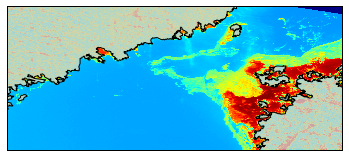

In [6]:
# get array of data from the dataset
import gdal
ds = gdal.Open('temp2.tif')
l412 = ds.GetRasterBand(1).ReadAsArray() 

# create grids of longitudes and latitudes
lons = np.linspace(12, 34, l412.shape[1])
lats = np.linspace(65, 61, l412.shape[0])
lons, lats = np.meshgrid(lons, lats)

# subset data for speedup
l412 = l412[200:500, 1300:2000]
lons = lons[200:500, 1300:2000]
lats = lats[200:500, 1300:2000]

# setup Basemap
m = Basemap(projection='cyl',
            llcrnrlon=lons.min(),
            llcrnrlat=lats.min(),
            urcrnrlon=lons.max(),
            urcrnrlat=lats.max(),
            resolution='h')

# plot 

m.drawcoastlines()
m.fillcontinents(alpha=0.8)
im1 = m.pcolormesh(lons, lats, l412, shading='flat', cmap=plt.cm.jet)

plt.show()